In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


In [2]:
dataset = pd.read_csv("Clean2019Data.csv")
dataset.shape

(254972, 21)

In [3]:
HighBP = pd.DataFrame(dataset['HighBP'])
HD = pd.DataFrame(dataset['HeartDiseaseorAttack'])
HighBP_train, HighBP_test, HD_train, HD_test = train_test_split(HighBP, HD, test_size = 0.2)
HighBP_train.shape

(203977, 1)

In [4]:
type(HighBP_train)

pandas.core.frame.DataFrame

## Using 1 Predictor (Logistic Regression)


In [5]:
lr = LogisticRegression()
lr.fit(HighBP_train, HD_train.values.ravel())


LogisticRegression()

In [6]:
lr.score(HighBP_train, HD_train)

0.9099359241483108

<AxesSubplot:>

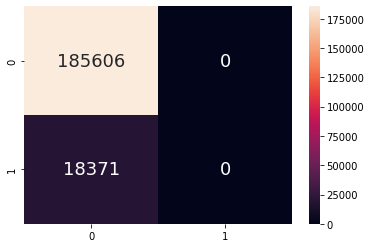

In [7]:
HD_predict = lr.predict(HighBP_train)
cm = confusion_matrix(HD_train, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

## Using 10 Predictors (Logistic Regression)


In [8]:
lr = LogisticRegression(solver = 'lbfgs', max_iter= 254972)
train, test = train_test_split(dataset, test_size = 0.2)
train.iloc[:,1:11].head()


,HighBP,HighChol,Smoker,BMI,Stroke,Diabetes,Exercise,_FRTLT1A,_VEGLT1A,_RFDRHV7
5342,0.0,0.0,0.0,25.0,0.0,0.0,1.0,1.0,1.0,1.0
101280,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,1.0
108774,0.0,0.0,0.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0
207756,0.0,0.0,0.0,31.0,0.0,0.0,1.0,0.0,1.0,1.0
131035,0.0,0.0,0.0,30.0,0.0,0.0,1.0,0.0,1.0,1.0


In [9]:
train.iloc[:,1:11].shape

(203977, 10)

In [10]:
train_predictors = train.iloc[:,1:11]
train_response = train[['HeartDiseaseorAttack']]

In [11]:
train_response.shape

(203977, 1)

In [12]:
lr.fit(train_predictors, train_response.values.ravel())
print(f"Logistic Regression with 1 Predictor gives a score of {lr.score(train_predictors, train_response)} for the train set.")

Logistic Regression with 1 Predictor gives a score of 0.9100682920133152 for the train set.


In [13]:
test_predictors = test.iloc[:,1:11]
test_response = test[['HeartDiseaseorAttack']]
test_response.shape

(50995, 1)

In [14]:
lr.fit(test_predictors, test_response.values.ravel())
print(f"Logistic Regression with 1 Predictor gives a score of {lr.score(test_predictors, test_response)} for the test set.")

Logistic Regression with 1 Predictor gives a score of 0.9099715658397882 for the test set.


<AxesSubplot:>

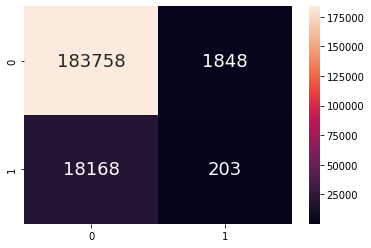

In [15]:
HD_predict = lr.predict(train_predictors)
cm = confusion_matrix(HD_train, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

# Using 10 Predictors (Random Forest Regression)

In [16]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(train_predictors, train_response.values.ravel())
rfc.score(train_predictors, train_response)

0.9167847355339083

In [17]:
rfc.fit(test_predictors, test_response.values.ravel())
rfc.score(test_predictors, test_response)

0.9249338170408864

<AxesSubplot:>

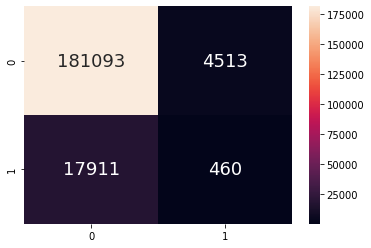

In [18]:
HD_predict = rfc.predict(train_predictors)
cm = confusion_matrix(HD_train, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

# Using 10 Predictors (Support Vector Classification with C=1.0)

In [19]:
from sklearn import preprocessing
train_predictors = preprocessing.scale(train_predictors)
train_predictors.shape

(203977, 10)

In [20]:
svc = LinearSVC(C=1.0, max_iter=203977)
svc.fit(train_predictors, train_response.values.ravel())
svc.score(train_predictors, train_response)

0.9099457291753482

In [23]:
test_predictors = preprocessing.scale(test_predictors)
svc.fit(test_predictors, test_response.values.ravel())
svc.score(test_predictors, test_response)

0.9108147857633101

<AxesSubplot:>

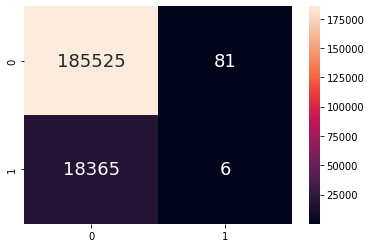

In [24]:
HD_predict = svc.predict(train_predictors)
cm = confusion_matrix(HD_train, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})